In [1]:
import os
import urllib.request

import warnings
warnings.filterwarnings("ignore")

PROJECT_DIR= "."
CHAPTER_ID="Titanic"
DATASET_URL= "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"
DATASET_PATH= os.path.join("Datasets", "titanic")
IMAGES_PATH= os.path.join(PROJECT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def fetch_titanic(url=DATASET_URL, path=DATASET_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

fetch_titanic()    

In [2]:
import pandas as pd

def load_titanic(filename, path=DATASET_PATH):
    csv_path=os.path.join(path, filename)
    return pd.read_csv(csv_path, error_bad_lines=False)

In [3]:
train=load_titanic("train.csv")
test=load_titanic("test.csv")

In [4]:
print(f"Train Dataset shape: {train.shape}\n\nTest Dataset shape: {test.shape}")

Train Dataset shape: (891, 12)

Test Dataset shape: (418, 11)


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train["PassengerId"].isin(test["PassengerId"]).sum()

0

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Dataset Exploration and EDA.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [11]:
dataset=pd.concat(objs=[train, test], axis=0)
dataset.shape

(1309, 12)

In [12]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
dataset=dataset.set_index("PassengerId")
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0000,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292


Saving figure Survival by Gender


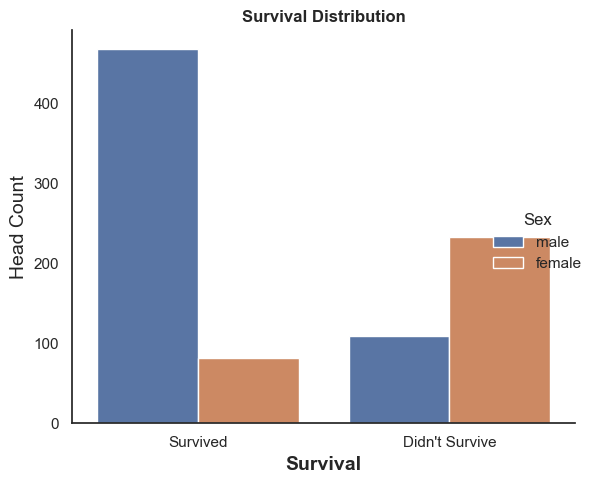

In [17]:
#Visualize the target class
sns.set(style="white", color_codes=True)
ax=sns.catplot("Survived", data=dataset, kind="count", hue="Sex", height=5)
plt.title("Survival Distribution", weight="bold")
plt.xlabel("Survival", weight="bold", size=14)
plt.ylabel("Head Count", size=14)
ax.set_xticklabels(["Survived", "Didn't Survive"], rotation=0)
save_fig("Survival by Gender")
plt.show();

Saving figure Survival by Place of Embarking


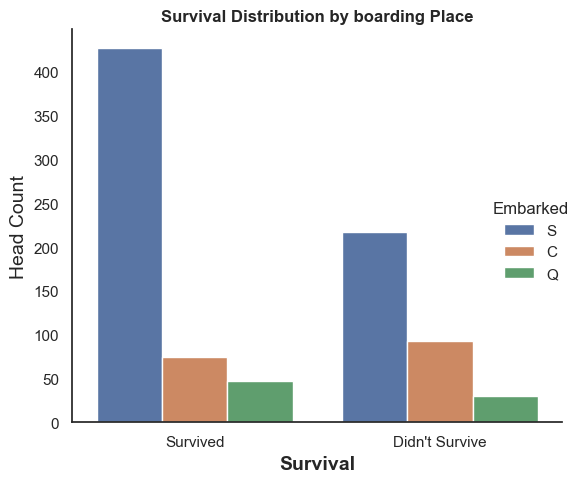

In [18]:
sns.set(style="white", color_codes=True)
ax=sns.catplot("Survived", data=dataset, kind="count", hue="Embarked", height=5)
plt.title("Survival Distribution by boarding Place", weight="bold")
plt.xlabel("Survival", weight="bold", size=14)
plt.ylabel("Head Count", size=14)
ax.set_xticklabels(["Survived", "Didn't Survive"], rotation=0)
save_fig("Survival by Place of Embarking")
plt.show();

Saving figure Survival by Passenger Class


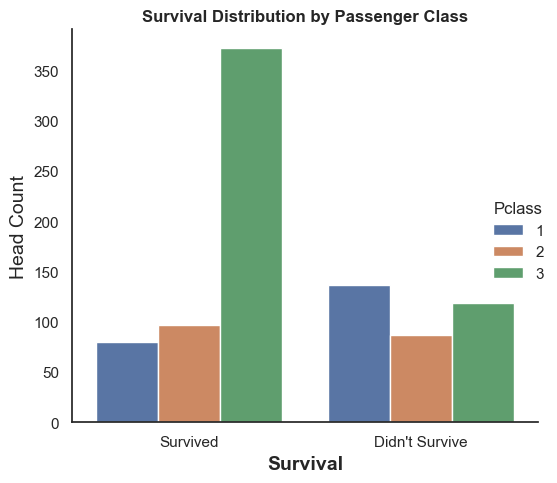

In [19]:
sns.set(style="white", color_codes=True)
ax=sns.catplot("Survived", data=dataset, kind="count", hue="Pclass", height=5)
plt.title("Survival Distribution by Passenger Class", weight="bold")
plt.xlabel("Survival", weight="bold", size=14)
plt.ylabel("Head Count", size=14)
ax.set_xticklabels(["Survived", "Didn't Survive"], rotation=0)
save_fig("Survival by Passenger Class")
plt.show();

Saving figure Survival by Age Decade


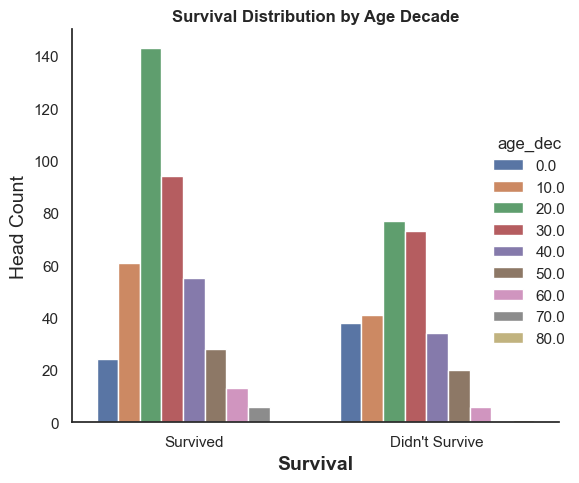

In [20]:
dataset['age_dec']=dataset.Age.map(lambda Age:10*(Age//10))

sns.set(style="white", color_codes=True)
ax=sns.catplot("Survived", data=dataset, kind="count", hue="age_dec", height=5)
plt.title("Survival Distribution by Age Decade", weight="bold")
plt.xlabel("Survival", weight="bold", size=14)
plt.ylabel("Head Count", size=14)
ax.set_xticklabels(["Survived", "Didn't Survive"], rotation=0)
save_fig("Survival by Age Decade")
plt.show();

In [21]:
dataset.age_dec.value_counts()

20.0    344
30.0    232
10.0    143
40.0    135
0.0      82
50.0     70
60.0     32
70.0      7
80.0      1
Name: age_dec, dtype: int64

In [22]:
dataset[["age_dec", "Survived"]].groupby(["age_dec"]).sum()

,Survived
age_dec,
0.0,38.0
10.0,41.0
20.0,77.0
30.0,73.0
40.0,34.0
50.0,20.0
60.0,6.0
70.0,0.0
80.0,1.0


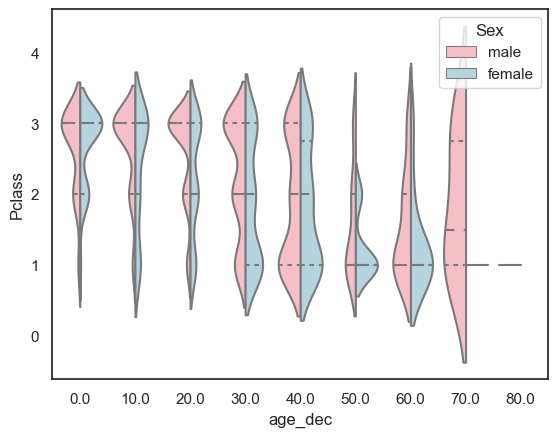

In [23]:
sns.violinplot(x="age_dec", y="Pclass", hue="Sex",data=dataset,
               split=True, inner='quartile',
               palette=['lightpink', 'lightblue']);

<AxesSubplot: xlabel='Age'>

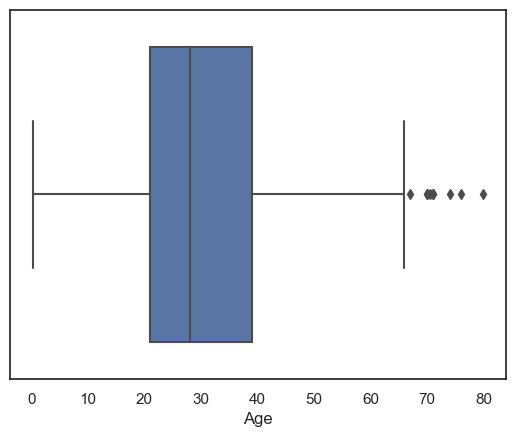

In [24]:
sns.boxplot(dataset["Age"])

### Preprocessing and Model Building.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score


In [26]:
dataset.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
age_dec      263
dtype: int64

In [27]:
p_missing= dataset.isnull().sum()*100/len(dataset)
missing=pd.DataFrame({"columns ":dataset.columns,
                     "Missing Percentage": p_missing})
missing.reset_index(drop=True, inplace=True)
missing

,columns,Missing Percentage
0,Survived,31.932773
1,Pclass,0.000000
2,Name,0.000000
3,Sex,0.000000
4,Age,20.091673
5,SibSp,0.000000
6,Parch,0.000000
7,Ticket,0.000000
8,Fare,0.076394
9,Cabin,77.463713


In [28]:
col_drop=['Name','Ticket', 'Cabin']
print(f"Dataset shape before dropping: {dataset.shape}")
dataset=dataset.drop(columns=col_drop)
print(f"Dataset shape after dropping: {dataset.shape}")

Dataset shape before dropping: (1309, 12)
Dataset shape after dropping: (1309, 9)


In [29]:
#Numerical and Categorical columns
cat=[col for col in dataset.select_dtypes('object').columns]
num=[col for col in dataset.select_dtypes('int', 'float').columns if col not in ['Survived']]
print(cat)
print(num)

['Sex', 'Embarked']
['Pclass', 'SibSp', 'Parch']


In [30]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_dec
PassengerId,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,20.0
2,1.0,1,female,38.0,1,0,71.2833,C,30.0
3,1.0,3,female,26.0,0,0,7.9250,S,20.0
4,1.0,1,female,35.0,1,0,53.1000,S,30.0
5,0.0,3,male,35.0,0,0,8.0500,S,30.0


##### Splitting the dataset.

In [31]:
train=dataset[:891]
test=dataset[891:].drop("Survived", axis=1)
test.shape

(418, 8)

In [32]:
train.shape

(891, 9)

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_dec
PassengerId,,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S,20.0
2,1.0,1,female,38.0,1,0,71.2833,C,30.0
3,1.0,3,female,26.0,0,0,7.9250,S,20.0
4,1.0,1,female,35.0,1,0,53.1000,S,30.0
5,0.0,3,male,35.0,0,0,8.0500,S,30.0


In [34]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_dec
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,30.0
893,3,female,47.0,1,0,7.0000,S,40.0
894,2,male,62.0,0,0,9.6875,Q,60.0
895,3,male,27.0,0,0,8.6625,S,20.0
896,3,female,22.0,1,1,12.2875,S,20.0


#### Data Preprocessing.

In [35]:
num_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

full_pipeline=ColumnTransformer([
    ("cat", cat_pipeline, cat),
    ("num", num_pipeline, num)
])

In [36]:
X_train=full_pipeline.fit_transform(train[cat+num])
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.82737724,
         0.43279337, -0.47367361],
       [ 1.        ,  0.        ,  1.        , ..., -1.56610693,
         0.43279337, -0.47367361],
       [ 1.        ,  0.        ,  0.        , ...,  0.82737724,
        -0.4745452 , -0.47367361],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.82737724,
         0.43279337,  2.00893337],
       [ 0.        ,  1.        ,  1.        , ..., -1.56610693,
        -0.4745452 , -0.47367361],
       [ 0.        ,  1.        ,  0.        , ...,  0.82737724,
        -0.4745452 , -0.47367361]])

In [37]:
y_train=train["Survived"]

In [38]:
X_test=full_pipeline.fit_transform(test[cat+num])
X_test

array([[ 0.        ,  1.        ,  0.        , ...,  0.87348191,
        -0.49947002, -0.4002477 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.87348191,
         0.61699237, -0.4002477 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.31581919,
        -0.49947002, -0.4002477 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.87348191,
        -0.49947002, -0.4002477 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.87348191,
        -0.49947002, -0.4002477 ],
       [ 0.        ,  1.        ,  1.        , ...,  0.87348191,
         0.61699237,  0.61989583]])

### Models.

In [39]:
rf=RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train )

RandomForestClassifier(n_estimators=200, random_state=42)

In [40]:
y_pred=rf.predict(X_test)

In [41]:
scores=cross_val_score(rf, X_train, y_train, cv=20)
scores.mean()

0.8001767676767677

In [42]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=1000,
    max_depth=8,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [43]:
y_pred=model.predict(X_test)

In [44]:
scores=cross_val_score(model, X_train, y_train, cv=20)
scores.mean()

0.7923737373737374

In [48]:
svm=SVC(gamma="auto")
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [49]:
y_pred=svm.predict(X_test)


In [50]:
scores=cross_val_score(svm, X_train,y_train, cv=20)
scores.mean()

0.8080303030303032

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(X_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g');

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets